#### Loading ML Models with Different Data Types

In [1]:
from helper import DummyModel

In [2]:
model = DummyModel()

In [3]:
model

DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [4]:
def print_param_dtype(model):
    for name, param in model.named_parameters():
        print(f"{name} is loaded in {param.dtype}")

In [5]:
print_param_dtype(model)

token_embedding.weight is loaded in torch.float32
linear_1.weight is loaded in torch.float32
linear_1.bias is loaded in torch.float32
layernorm_1.weight is loaded in torch.float32
layernorm_1.bias is loaded in torch.float32
linear_2.weight is loaded in torch.float32
linear_2.bias is loaded in torch.float32
layernorm_2.weight is loaded in torch.float32
layernorm_2.bias is loaded in torch.float32
head.weight is loaded in torch.float32
head.bias is loaded in torch.float32


#### Model Casting: `float16`

- Cast the model into a different precision.

In [6]:
# float 16
model_fp16 = DummyModel().half()

In [7]:
print_param_dtype(model_fp16)

token_embedding.weight is loaded in torch.float16
linear_1.weight is loaded in torch.float16
linear_1.bias is loaded in torch.float16
layernorm_1.weight is loaded in torch.float16
layernorm_1.bias is loaded in torch.float16
linear_2.weight is loaded in torch.float16
linear_2.bias is loaded in torch.float16
layernorm_2.weight is loaded in torch.float16
layernorm_2.bias is loaded in torch.float16
head.weight is loaded in torch.float16
head.bias is loaded in torch.float16


In [8]:
model_fp16

DummyModel(
  (token_embedding): Embedding(2, 2)
  (linear_1): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_1): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (linear_2): Linear(in_features=2, out_features=2, bias=True)
  (layernorm_2): LayerNorm((2,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=2, out_features=2, bias=True)
)

In [10]:
import torch

In [11]:
dummy_input = torch.LongTensor([[1, 0], 
                                [0, 1]])

In [12]:
logits_fp32 = model(dummy_input)

In [13]:
logits_fp32

tensor([[[-0.6872,  0.7132],
         [-0.6872,  0.7132]],

        [[-0.6872,  0.7132],
         [-0.6872,  0.7132]]], grad_fn=<ViewBackward0>)

In [14]:
# inference using float16 model
try:
    logits_fp16 = model_fp16(dummy_input)
except Exception as error:
    print("\033[91m", type(error).__name__, ": ", error, "\033[0m")

In [15]:
logits_fp16

tensor([[[-0.6870,  0.7134],
         [-0.6870,  0.7134]],

        [[-0.6870,  0.7134],
         [-0.6870,  0.7134]]], dtype=torch.float16, grad_fn=<ViewBackward0>)

In [16]:
from copy import deepcopy

In [17]:
model_bf16 = deepcopy(model)

In [18]:
model_bf16 = model_bf16.to(torch.bfloat16)

In [19]:
print_param_dtype(model_bf16)

token_embedding.weight is loaded in torch.bfloat16
linear_1.weight is loaded in torch.bfloat16
linear_1.bias is loaded in torch.bfloat16
layernorm_1.weight is loaded in torch.bfloat16
layernorm_1.bias is loaded in torch.bfloat16
linear_2.weight is loaded in torch.bfloat16
linear_2.bias is loaded in torch.bfloat16
layernorm_2.weight is loaded in torch.bfloat16
layernorm_2.bias is loaded in torch.bfloat16
head.weight is loaded in torch.bfloat16
head.bias is loaded in torch.bfloat16


In [20]:
logits_bf16 = model_bf16(dummy_input)
logits_bf16

tensor([[[-0.6875,  0.7148],
         [-0.6875,  0.7148]],

        [[-0.6875,  0.7148],
         [-0.6875,  0.7148]]], dtype=torch.bfloat16, grad_fn=<ViewBackward0>)

#### Difference Between FP16 and BF16

| Feature                | FP16                          | BF16                           |
|------------------------|-------------------------------|--------------------------------|
| **Exponent bits**       | 5 bits                        | 8 bits                         |
| **Mantissa bits**       | 10 bits                       | 7 bits                         |
| **Precision**           | Higher precision for smaller values | Lower precision but broader range |
| **Range**               | Smaller exponent range        | Larger exponent range (similar to FP32) |
| **Best suited for**     | Graphics, smaller range ML    | Deep learning, handling large values |
| **Hardware support**    | GPUs (NVIDIA, AMD)            | TPUs (Google), Intel processors |

#### Key Differences:
- **FP16**: High precision for smaller numbers, suitable for graphics and smaller range machine learning tasks.
- **BF16**: Better suited for deep learning and AI tasks, capable of handling a wider range of numbers with slight precision trade-off.


In [21]:
from transformers import BlipForConditionalGeneration

In [22]:
model_name = "Salesforce/blip-image-captioning-base"

In [23]:
model = BlipForConditionalGeneration.from_pretrained(model_name)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [24]:
model.get_memory_footprint()

989660400

In [25]:
model_bf16 = BlipForConditionalGeneration.from_pretrained(
                                model_name,
                                torch_dtype=torch.bfloat16
)

In [26]:
model_bf16.get_memory_footprint()

494832248

In [27]:
from transformers import BlipProcessor

In [28]:
processor = BlipProcessor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [29]:
from helper import load_image, get_generation
from IPython.display import display

In [32]:
img_url = r'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

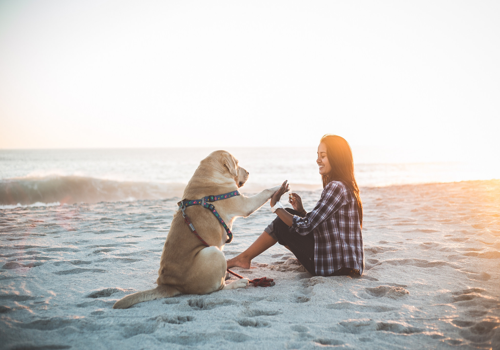

In [33]:
image = load_image(img_url)
display(image.resize((500, 350)))

In [34]:
get_generation(model, 
                              processor, 
                              image, 
                              torch.float32)

'a woman sitting on the beach with her dog'

In [ ]:
get_generation(model_bf16, 
                              processor, 
                              image, 
                              torch.bfloat16)